In [59]:

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Loading the data

In [60]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
# Reshape the data for use in a convolutional neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Creating the model

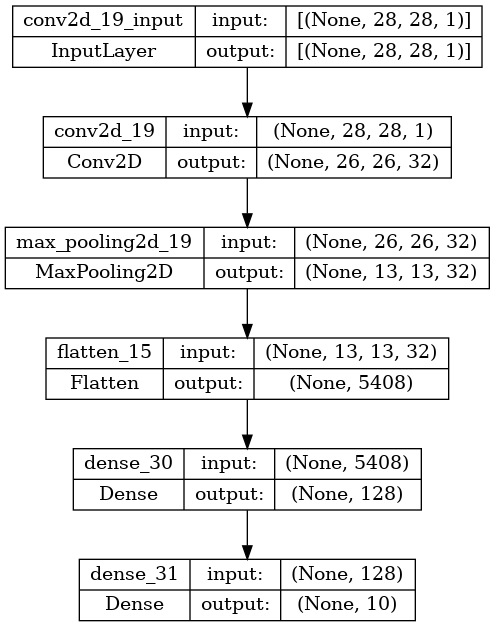

In [61]:
# We build the model using convolutional layers followed by max pooling layers
# Max pooling layers are used to down sample the feature maps summarizing the most actived presence of a feature
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# We use softmax as the activation to represent the confidence (0-1)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Training the model

In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1782 - accuracy: 0.9463 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 2/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 3/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0535 - val_accuracy: 0.9847
Epoch 4/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 5/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0707 - val_accuracy: 0.9809
Epoch 6/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0721 - val_accuracy: 0.9817
Epoch 7/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0092 - accuracy: 0.9970 - val_

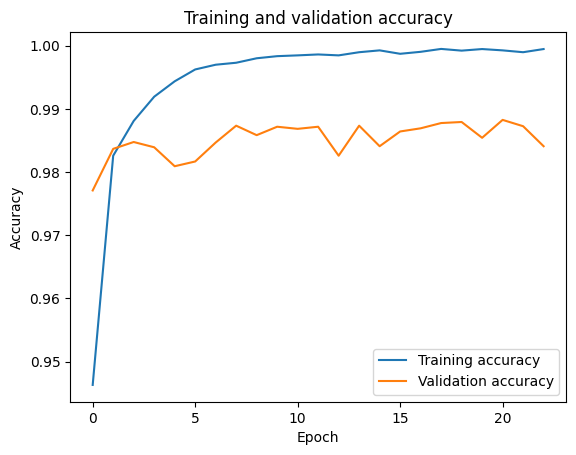

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9848    0.9918    0.9883       980
           1     0.9784    0.9991    0.9887      1135
           2     0.9912    0.9835    0.9874      1032
           3     0.9950    0.9832    0.9890      1010
           4     0.9959    0.9817    0.9887       982
           5     0.9694    0.9933    0.9812       892
           6     0.9895    0.9833    0.9864       958
           7     0.9779    0.9922    0.9850      1028
           8     0.9937    0.9641    0.9786       974
           9     0.9752    0.9762    0.9757      1009

    accuracy                         0.9850     10000
   macro avg     0.9851    0.9848    0.9849     10000
weighted avg     0.9851    0.9850    0.9850     10000



In [63]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the convolution window

In [64]:
# Build the model with a larger convolution window
model = keras.Sequential([
    keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1895 - accuracy: 0.9424 - val_loss: 0.0663 - val_accuracy: 0.9814
Epoch 2/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0484 - val_accuracy: 0.9853
Epoch 3/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 4/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0490 - val_accuracy: 0.9863
Epoch 5/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0430 - val_accuracy: 0.9879
Epoch 6/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0497 - val_accuracy: 0.9869
Epoch 7/1000
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0172 - accuracy: 0.9944 - val_

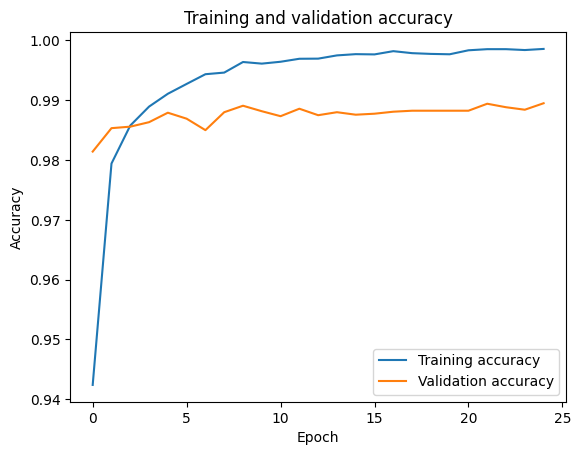

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9919    0.9949    0.9934       980
           1     0.9938    0.9956    0.9947      1135
           2     0.9912    0.9874    0.9893      1032
           3     0.9950    0.9901    0.9926      1010
           4     0.9908    0.9908    0.9908       982
           5     0.9888    0.9933    0.9911       892
           6     0.9937    0.9906    0.9922       958
           7     0.9864    0.9912    0.9888      1028
           8     0.9888    0.9928    0.9908       974
           9     0.9910    0.9851    0.9881      1009

    accuracy                         0.9912     10000
   macro avg     0.9912    0.9912    0.9912     10000
weighted avg     0.9912    0.9912    0.9912     10000



In [65]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the stride

In [66]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.9117 - val_loss: 0.1083 - val_accuracy: 0.9683
Epoch 2/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9666 - val_loss: 0.0775 - val_accuracy: 0.9759
Epoch 3/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0636 - val_accuracy: 0.9807
Epoch 4/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0565 - val_accuracy: 0.9824
Epoch 5/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0511 - val_accuracy: 0.9842
Epoch 6/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0487 - val_accuracy: 0.9858
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0494 -

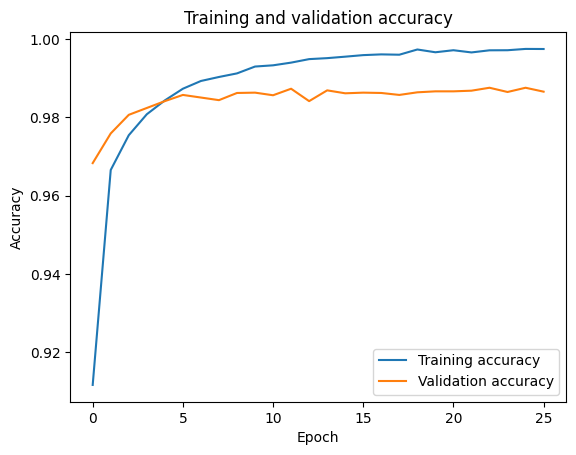

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9848    0.9939    0.9893       980
           1     0.9869    0.9956    0.9912      1135
           2     0.9817    0.9884    0.9850      1032
           3     0.9882    0.9911    0.9896      1010
           4     0.9928    0.9817    0.9872       982
           5     0.9921    0.9854    0.9888       892
           6     0.9854    0.9864    0.9859       958
           7     0.9882    0.9776    0.9829      1028
           8     0.9826    0.9856    0.9841       974
           9     0.9841    0.9792    0.9816      1009

    accuracy                         0.9866     10000
   macro avg     0.9867    0.9865    0.9866     10000
weighted avg     0.9866    0.9866    0.9866     10000



In [67]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Higher dropout rate

In [68]:
# Build the model with a higher dropout rate
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2839 - accuracy: 0.9140 - val_loss: 0.0837 - val_accuracy: 0.9743
Epoch 2/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1223 - accuracy: 0.9634 - val_loss: 0.0659 - val_accuracy: 0.9797
Epoch 3/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0893 - accuracy: 0.9735 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 4/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0711 - accuracy: 0.9788 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 5/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 6/1000
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0537 - accuracy: 0.9825 - val_loss: 0.0522 - val_accuracy: 0.9861
Epoch 7/1000
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0454 - accuracy: 0.9855 - val_

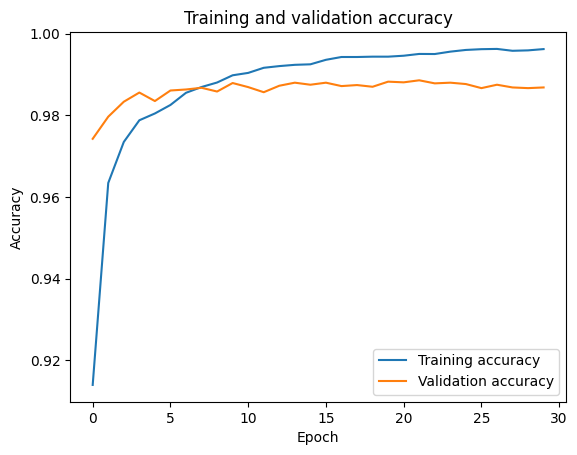

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9858    0.9939    0.9898       980
           1     0.9904    0.9982    0.9943      1135
           2     0.9780    0.9903    0.9841      1032
           3     0.9852    0.9911    0.9882      1010
           4     0.9949    0.9847    0.9898       982
           5     0.9921    0.9809    0.9865       892
           6     0.9905    0.9833    0.9869       958
           7     0.9931    0.9757    0.9843      1028
           8     0.9758    0.9918    0.9837       974
           9     0.9850    0.9782    0.9816      1009

    accuracy                         0.9870     10000
   macro avg     0.9871    0.9868    0.9869     10000
weighted avg     0.9871    0.9870    0.9870     10000



In [69]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))